Задача №1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.243e+04
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          1.46e-151
Time:                        02:36:18   Log-Likelihood:                 89.176
No. Observations:                 100   AIC:                            -172.4
Df Residuals:                      97   BIC:                            -164.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9812      0.015     63.357      0.0

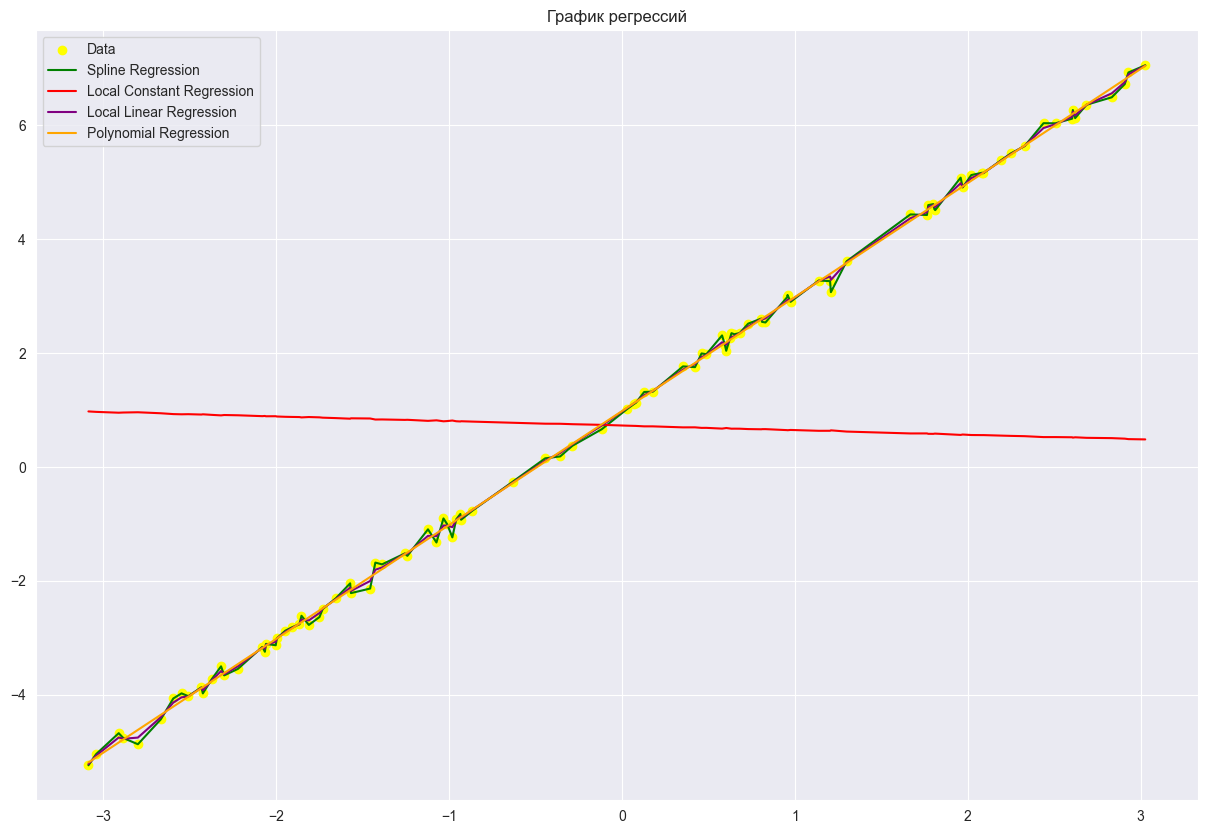

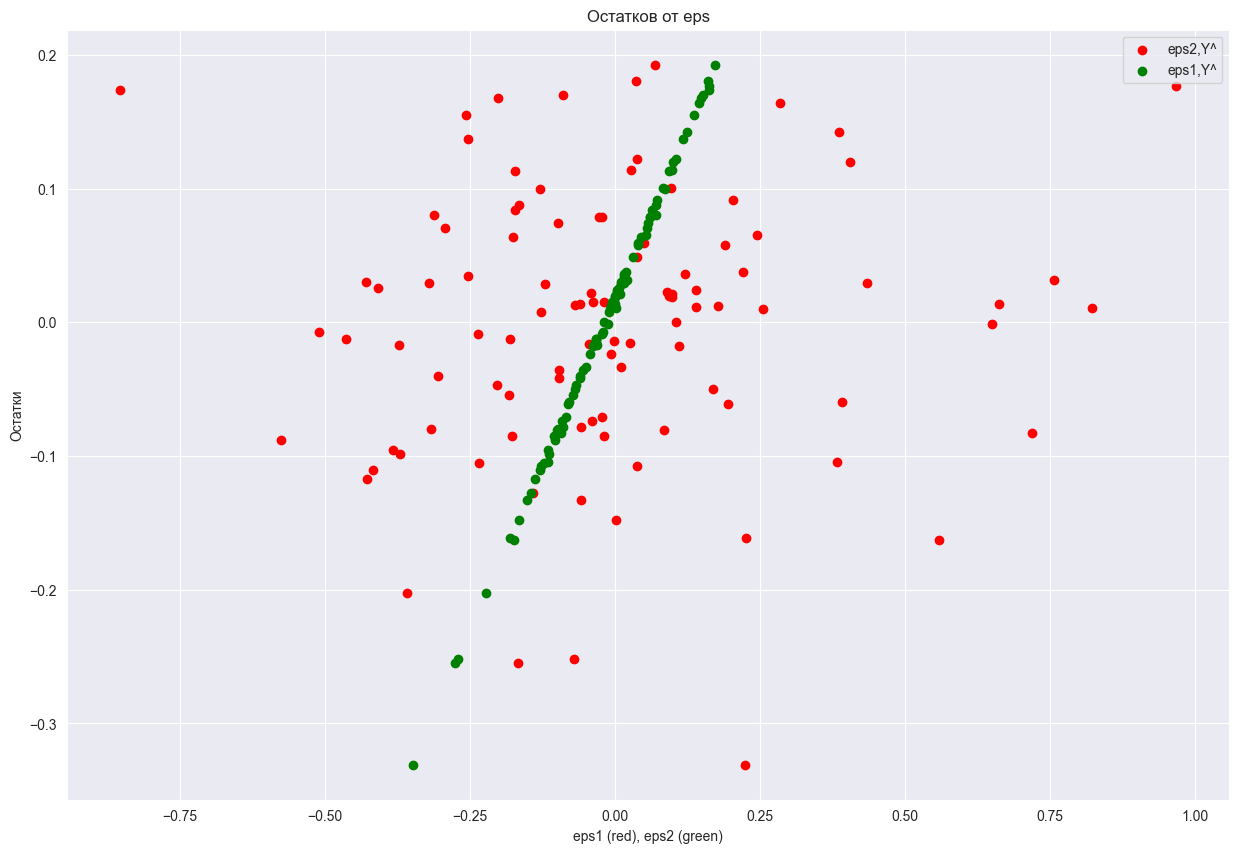

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     7335.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          1.41e-106
Time:                        02:36:18   Log-Likelihood:                -19.626
No. Observations:                 100   AIC:                             45.25
Df Residuals:                      97   BIC:                             53.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9342      0.046     20.322      0.0

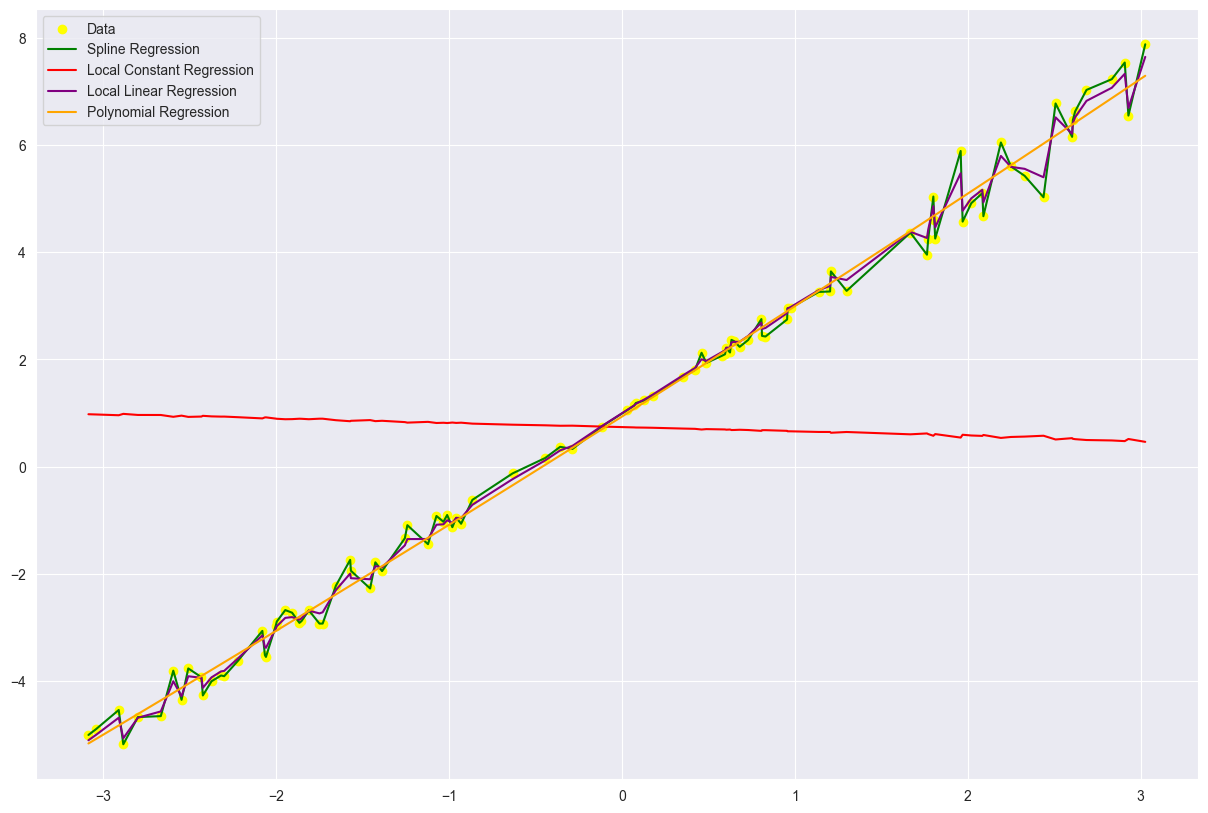

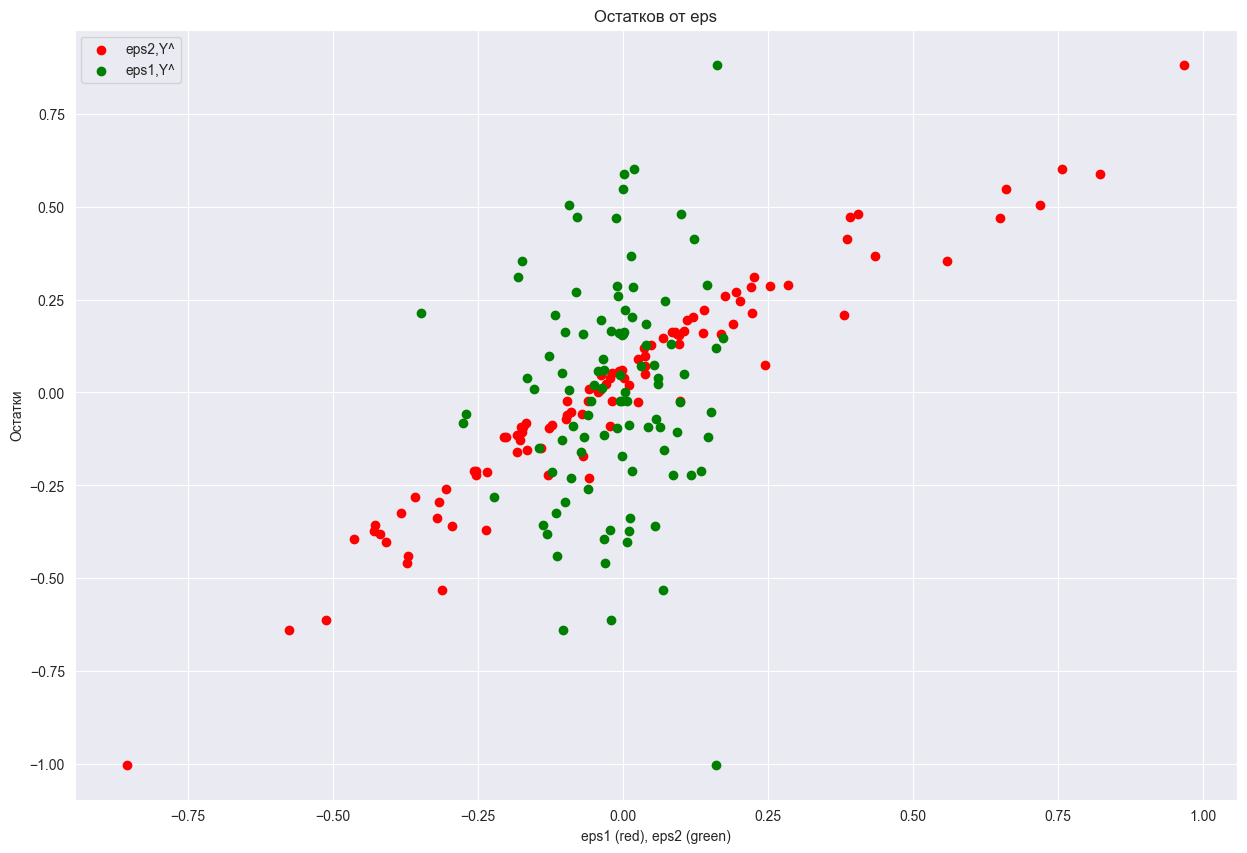

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     93.07
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.73e-23
Time:                        02:36:19   Log-Likelihood:                -58.765
No. Observations:                 100   AIC:                             123.5
Df Residuals:                      97   BIC:                             131.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9927      0.068     14.599      0.0

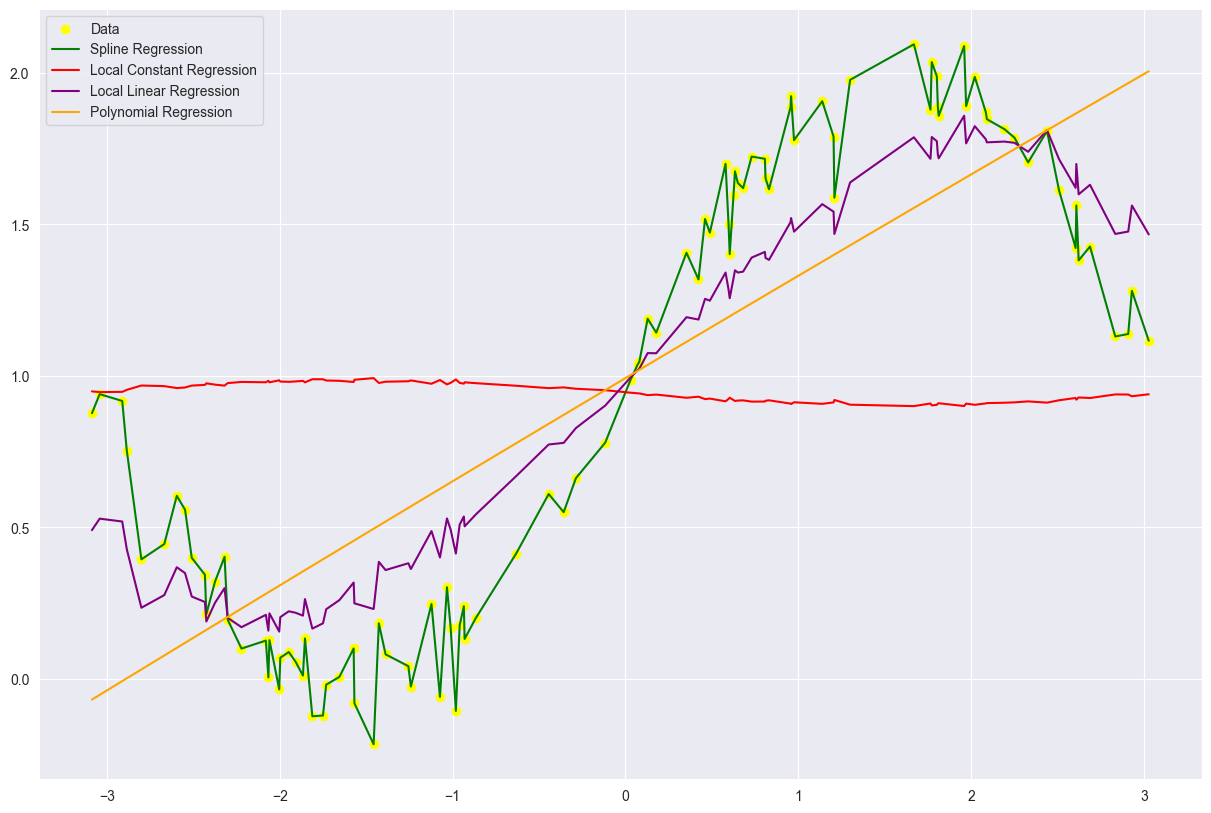

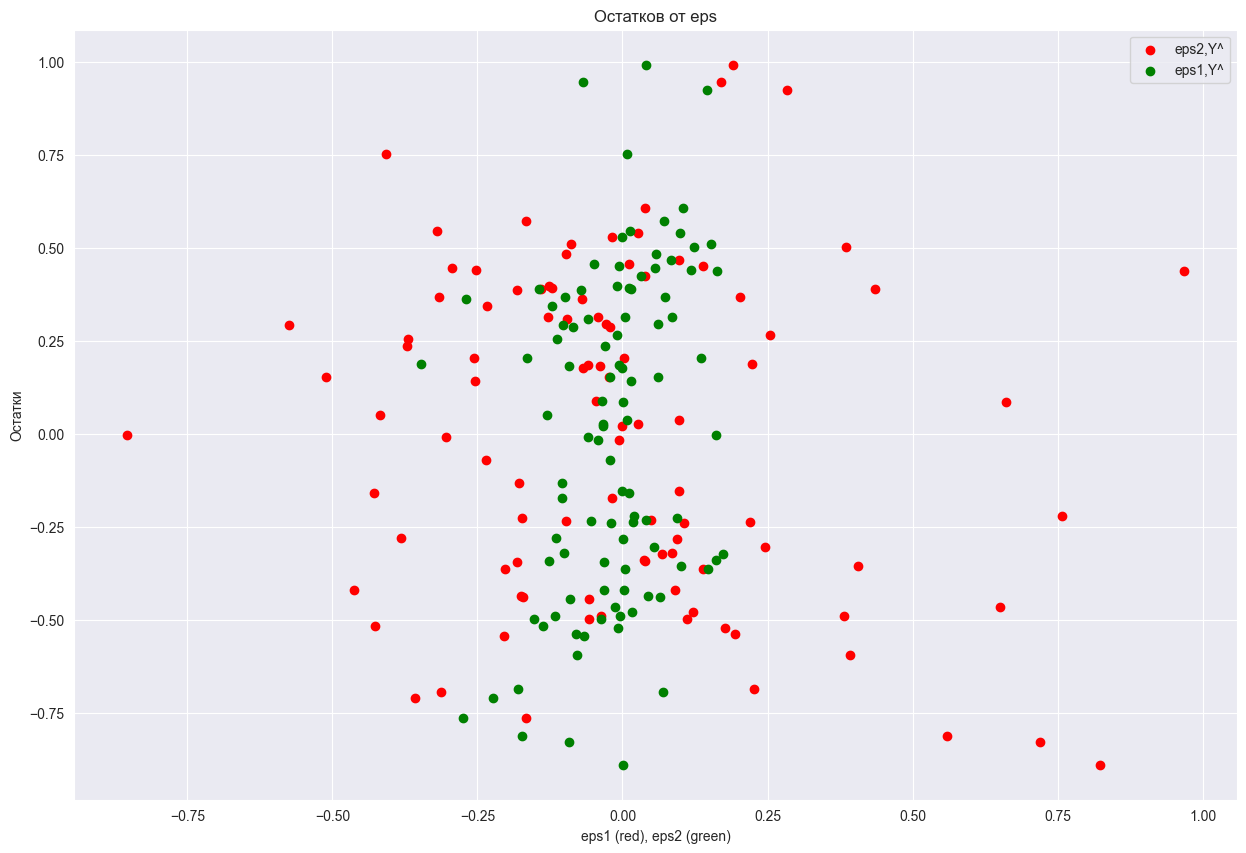

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.50
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           3.16e-24
Time:                        02:36:19   Log-Likelihood:                -65.432
No. Observations:                 100   AIC:                             136.9
Df Residuals:                      97   BIC:                             144.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9457      0.073     13.011      0.0

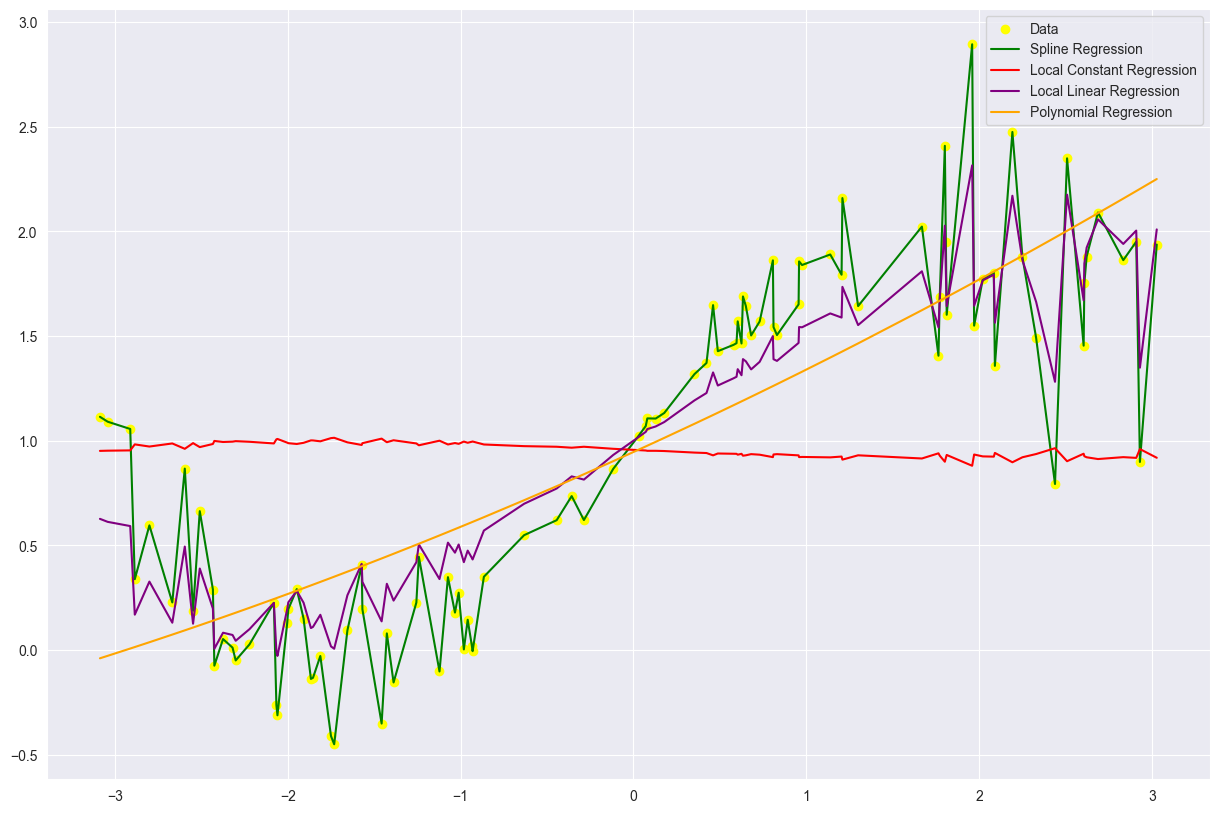

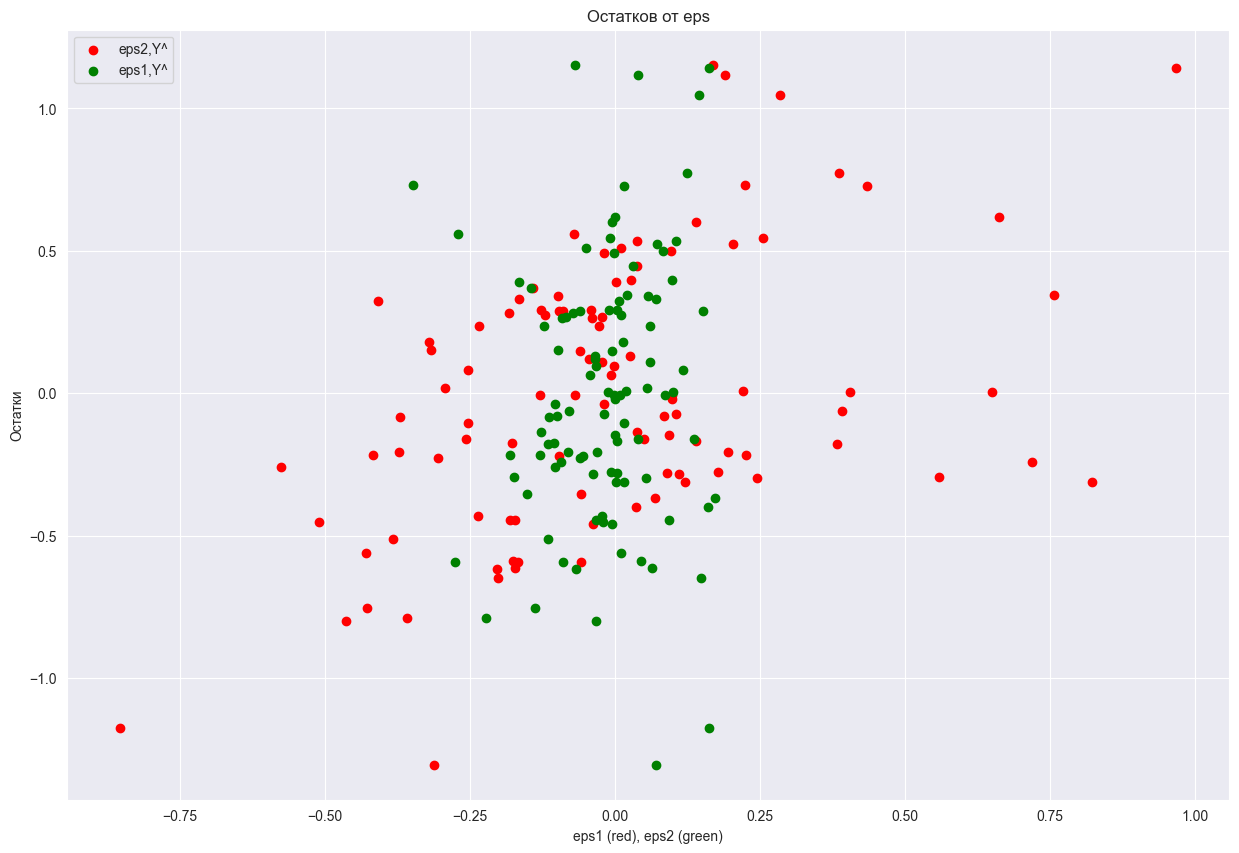

In [48]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
from statsmodels.nonparametric.kernel_regression import KernelReg
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

n = 100

#Var a
X0 = np.ones(n)
X = np.random.uniform(-math.pi,math.pi, n)
X.sort()
eps_1 = np.random.normal(0,0.1, n)
eps_2 = np.random.normal(0, abs(X/5), n)
Y_11 = 2*X + 1 + eps_1
Y_12 = 2*X + 1 + eps_2
Y_21 = np.sin(X) + eps_1 +1
Y_22 = np.sin(X) + eps_2 +1
df = pd.DataFrame({'X': X, 
                   'Y_11': Y_11, 
                   'Y_12': Y_12, 
                   'Y_21': Y_21, 
                   'Y_22': Y_22})

# model = statsmodels.nonparametric.kernel_regression.KernelReg(X, Y_11, 'u', reg_type = "lc").fit() 
# print(model)

# Локально постоянная и линейная регрессия
def local_constant_regression(X, Y, kernel):
    model = KernelReg(Y, X, var_type='u', reg_type='lc', bw='cv_ml', ukertype=kernel)
    return model

def local_linear_regression(X, Y, kernel):
    model = KernelReg(Y, X, var_type='u', reg_type='ll', bw='cv_ml', ukertype=kernel)
    return model

# Регрессия сплайнами
def spline_regression(X, Y):
    
    xs = sorted(zip(X, Y), key=lambda tup: tup[0])
    x_sorted = [x[0] for x in xs]
    y_sorted = [x[1] for x in xs]    
    tck = splrep(x_sorted, y_sorted, s=0)
    y_smooth = splev(x_sorted, tck, der=0)
    return x_sorted, y_smooth


# Построение регрессий и сравнение моделей

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken']
for kernel in kernels:
    results_lc_11 = local_constant_regression(X, Y_11, kernel)
    results_ll_11 = local_linear_regression(X, Y_11, kernel)
    results_lc_12 = local_constant_regression(X, Y_12, kernel)
    results_ll_12 = local_linear_regression(X, Y_12, kernel)
    results_lc_21 = local_constant_regression(X, Y_21, kernel)
    results_ll_21 = local_linear_regression(X, Y_21, kernel)
    results_lc_22 = local_constant_regression(X, Y_22, kernel)
    results_ll_22 = local_linear_regression(X, Y_22, kernel)
    



# Регрессия сплайнами
x_spline11, y_spline_11 = spline_regression(X, Y_11)
x_spline12, y_spline_12 = spline_regression(X, Y_12)
x_spline21, y_spline_21 = spline_regression(X, Y_21)
x_spline22, y_spline_22 = spline_regression(X, Y_22)

# Полиномиальная регрессия
X_poly = sm.add_constant(np.column_stack((X0, X, X**2)))
# X_poly2 = sm.add_constant(np.column_stack((X0, X)))
model_poly_11 = sm.OLS(Y_11, X_poly).fit()
model_poly_12 = sm.OLS(Y_12, X_poly).fit()
model_poly_21 = sm.OLS(Y_21, X_poly).fit()
model_poly_22 = sm.OLS(Y_22, X_poly).fit()




# Сравнение моделей по метрикам качества

b = model_poly_11.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
print(model_poly_11.summary())

print("R-squared for Local Constant Regression: ",results_lc_11.r_squared())
print("R-squared for Local Linear Regression: ",results_ll_11.r_squared())

# Calculate RSS for Spline Regression
y_pred = y_spline_11
mse = mean_squared_error(Y_11, y_pred)
rss = np.sum(mse * n)
print("RSS for Spline Regression:", rss)

# Calculate RSS for Local Constant Regression
y_pred = results_lc_11.fit(df['X'])[0]
mse = mean_squared_error(Y_11, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Constant Regression:", rss)

# Calculate RSS for Local Linear Regression
y_pred = results_ll_11.fit(df['X'])[0]
mse = mean_squared_error(Y_11, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Linear Regression:", rss)

# Calculate RSS for Polynomial Regression
y_pred = Y_plt
mse = mean_squared_error(Y_11, y_pred)
rss = np.sum(mse * n)
print("RSS for Polynomial Regression:", rss)


plt.figure(figsize=(15, 10))
plt.scatter(X, Y_11, color='yellow', label='Data')
plt.plot(x_spline11, y_spline_11, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_11.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_11.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_11.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_11.resid, color='green', label='eps1,Y^')
plt.title('Остатков от eps')
plt.ylabel('Остатки')
plt.xlabel('eps1 (red), eps2 (green)')
plt.legend()
plt.show()

b = model_poly_12.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
print(model_poly_12.summary())

print("R-squared for Local Constant Regression: ",results_lc_12.r_squared())
print("R-squared for Local Linear Regression: ",results_ll_12.r_squared())

# Calculate RSS for Spline Regression
y_pred = y_spline_12
mse = mean_squared_error(Y_12, y_pred)
rss = np.sum(mse * n)
print("RSS for Spline Regression:", rss)

# Calculate RSS for Local Constant Regression
y_pred = results_lc_12.fit(df['X'])[0]
mse = mean_squared_error(Y_21, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Constant Regression:", rss)

# Calculate RSS for Local Linear Regression
y_pred = results_ll_12.fit(df['X'])[0]
mse = mean_squared_error(Y_12, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Linear Regression:", rss)

# Calculate RSS for Polynomial Regression
y_pred = Y_plt
mse = mean_squared_error(Y_12, y_pred)
rss = np.sum(mse * n)
print("RSS for Polynomial Regression:", rss)


plt.figure(figsize=(15, 10))
plt.scatter(X, Y_12, color='yellow', label='Data')
plt.plot(x_spline12, y_spline_12, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_12.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_12.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_12.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_12.resid, color='green', label='eps1,Y^')
plt.title('Остатков от eps')
plt.ylabel('Остатки')
plt.xlabel('eps1 (red), eps2 (green)')
plt.legend()
plt.show()


b = model_poly_21.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
print(model_poly_21.summary())

print("R-squared for Local Constant Regression: ",results_lc_21.r_squared())
print("R-squared for Local Linear Regression: ",results_ll_21.r_squared())

# Calculate RSS for Spline Regression
y_pred = y_spline_21
mse = mean_squared_error(Y_21, y_pred)
rss = np.sum(mse * n)
print("RSS for Spline Regression:", rss)

# Calculate RSS for Local Constant Regression
y_pred = results_lc_21.fit(df['X'])[0]
mse = mean_squared_error(Y_21, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Constant Regression:", rss)

# Calculate RSS for Local Linear Regression
y_pred = results_ll_21.fit(df['X'])[0]
mse = mean_squared_error(Y_21, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Linear Regression:", rss)

# Calculate RSS for Polynomial Regression
y_pred = Y_plt
mse = mean_squared_error(Y_21, y_pred)
rss = np.sum(mse * n)
print("RSS for Polynomial Regression:", rss)

plt.figure(figsize=(15, 10))
plt.scatter(X, Y_21, color='yellow', label='Data')
plt.plot(x_spline21, y_spline_21, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_21.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_21.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_21.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_21.resid, color='green', label='eps1,Y^')
plt.title('Остатков от eps')
plt.ylabel('Остатки')
plt.xlabel('eps1 (red), eps2 (green)')
plt.legend()
plt.show()

b = model_poly_22.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
print(model_poly_22.summary())

print("R-squared for Local Constant Regression: ",results_lc_22.r_squared())
print("R-squared for Local Linear Regression: ",results_ll_22.r_squared())

# Calculate RSS for Spline Regression
y_pred = y_spline_22
mse = mean_squared_error(Y_22, y_pred)
rss = np.sum(mse * n)
print("RSS for Spline Regression:", rss)

# Calculate RSS for Local Constant Regression
y_pred = results_lc_22.fit(df['X'])[0]
mse = mean_squared_error(Y_22, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Constant Regression:", rss)

# Calculate RSS for Local Linear Regression
y_pred = results_ll_22.fit(df['X'])[0]
mse = mean_squared_error(Y_22, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Linear Regression:", rss)

# Calculate RSS for Polynomial Regression
y_pred = Y_plt
mse = mean_squared_error(Y_22, y_pred)
rss = np.sum(mse * n)
print("RSS for Polynomial Regression:", rss)



plt.figure(figsize=(15, 10))

plt.scatter(X, Y_22, color='yellow', label='Data')
plt.plot(x_spline22, y_spline_22, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_22.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_22.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_22.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_22.resid, color='green', label='eps1,Y^')
plt.title('Остатков от eps')
plt.ylabel('Остатки')
plt.xlabel('eps1 (red), eps2 (green)')
plt.legend()
plt.show()

zsh:1: /usr/local/bin/pip: bad interpreter: /System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: no such file or directory
